# PLS regression

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.api import qqplot
from statsmodels.formula.api import ols #for linear regression
import seaborn as sns #for heatmap
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import scale 

In [3]:
data=pd.read_excel("education.xlsx")

In [4]:
data.head()

,num,sup.help,sup.under,sup.safe,sup.conc,adv.comp,adv.acces,adv.comm,adv.qual,tut.prof,...,sat.glad,sat.expe,sat.over,loy.proud,loy.recom,loy.asha,loy.back,gender,scholarships,job
0,1,7,1,7,4,5,5,6,6,5,...,7,7,7,7,7,1,7,female,yes_scholship,no_job
1,2,7,1,6,4,6,6,5,6,6,...,7,7,7,7,7,1,7,female,yes_scholship,yes_job
2,3,6,1,6,6,6,6,6,6,6,...,7,6,6,7,7,1,7,female,yes_scholship,no_job
3,4,1,7,3,1,1,2,1,1,3,...,1,1,1,1,1,7,1,male,no_scholship,no_job
4,5,6,5,5,7,7,6,7,7,7,...,7,7,7,7,7,1,7,female,yes_scholship,yes_job


In [5]:
data.info()  # we have no NAs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 27 columns):
num             181 non-null int64
sup.help        181 non-null int64
sup.under       181 non-null int64
sup.safe        181 non-null int64
sup.conc        181 non-null int64
adv.comp        181 non-null int64
adv.acces       181 non-null int64
adv.comm        181 non-null int64
adv.qual        181 non-null int64
tut.prof        181 non-null int64
tut.sched       181 non-null int64
tut.stud        181 non-null int64
tut.qual        181 non-null int64
val.devel       181 non-null int64
val.deci        181 non-null int64
val.meet        181 non-null int64
val.info        181 non-null int64
sat.glad        181 non-null int64
sat.expe        181 non-null int64
sat.over        181 non-null int64
loy.proud       181 non-null int64
loy.recom       181 non-null int64
loy.asha        181 non-null int64
loy.back        181 non-null int64
gender          181 non-null object
scholarships    181

In [6]:
data=data.drop("num",axis=1) #no need to keep this column

In [7]:
data_object=data.select_dtypes(include="object")
data_numeric=data.select_dtypes(exclude="object")

In [8]:
data_object.head()

,gender,scholarships,job
0,female,yes_scholship,no_job
1,female,yes_scholship,yes_job
2,female,yes_scholship,no_job
3,male,no_scholship,no_job
4,female,yes_scholship,yes_job


In [9]:
for i in data_object.columns:
    j=data_object[i].value_counts(dropna=False)
    h=len(data_object[i].unique())
    print(i,"_____", h,"\n",j,"\n","\n")
    print("--------------------")

gender _____ 2 
 female    133
male       48
Name: gender, dtype: int64 
 

--------------------
scholarships _____ 2 
 yes_scholship    105
no_scholship      76
Name: scholarships, dtype: int64 
 

--------------------
job _____ 2 
 yes_job    95
no_job     86
Name: job, dtype: int64 
 

--------------------


In [10]:
data_dummies=pd.get_dummies(data_object,drop_first=True)

In [11]:
data_dummies.head()

,gender_male,scholarships_yes_scholship,job_yes_job
0,0,1,0
1,0,1,1
2,0,1,0
3,1,0,0
4,0,1,1


In [12]:
data_numeric.head()

,sup.help,sup.under,sup.safe,sup.conc,adv.comp,adv.acces,adv.comm,adv.qual,tut.prof,tut.sched,...,val.deci,val.meet,val.info,sat.glad,sat.expe,sat.over,loy.proud,loy.recom,loy.asha,loy.back
0,7,1,7,4,5,5,6,6,5,4,...,5,6,7,7,7,7,7,7,1,7
1,7,1,6,4,6,6,5,6,6,6,...,4,7,6,7,7,7,7,7,1,7
2,6,1,6,6,6,6,6,6,6,6,...,7,7,7,7,6,6,7,7,1,7
3,1,7,3,1,1,2,1,1,3,2,...,1,1,2,1,1,1,1,1,7,1
4,6,5,5,7,7,6,7,7,7,7,...,7,7,7,7,7,7,7,7,1,7


In [13]:
data_numeric.var()==0

sup.help     False
sup.under    False
sup.safe     False
sup.conc     False
adv.comp     False
adv.acces    False
adv.comm     False
adv.qual     False
tut.prof     False
tut.sched    False
tut.stud     False
tut.qual     False
val.devel    False
val.deci     False
val.meet     False
val.info     False
sat.glad     False
sat.expe     False
sat.over     False
loy.proud    False
loy.recom    False
loy.asha     False
loy.back     False
dtype: bool

In [14]:
data_final=data_numeric.join(data_dummies,how="outer")

In [15]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 26 columns):
sup.help                      181 non-null int64
sup.under                     181 non-null int64
sup.safe                      181 non-null int64
sup.conc                      181 non-null int64
adv.comp                      181 non-null int64
adv.acces                     181 non-null int64
adv.comm                      181 non-null int64
adv.qual                      181 non-null int64
tut.prof                      181 non-null int64
tut.sched                     181 non-null int64
tut.stud                      181 non-null int64
tut.qual                      181 non-null int64
val.devel                     181 non-null int64
val.deci                      181 non-null int64
val.meet                      181 non-null int64
val.info                      181 non-null int64
sat.glad                      181 non-null int64
sat.expe                      181 non-null int64
sat.over     

In [16]:
Y=data_final[["sat.glad","sat.expe","sat.over"]]
X=scale(data_final.drop(columns=["sat.glad","sat.expe","sat.over"]))


In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [19]:
pls = PLSRegression(5)     # we choose to have 5 latent variables
pls=pls.fit(X_train,Y_train)

In [20]:
prediction=pls.predict(X_test)

In [21]:
pls_r2=pls.score(X_test,Y_test)  #the accuracy of the model is only 47 %
print(pls_r2)               

0.4768418277212076


In [22]:
coef=pd.DataFrame(pls.coef_)  #those that are near 1 in absolute values are the most sighnificant(correlated) ones
coef.head()

,0,1,2
0,-0.025990,0.026766,-0.061218
1,-0.009372,-0.082789,-0.044059
2,0.019159,0.113205,0.069730
3,0.009616,0.016896,-0.012669
4,0.030593,0.048871,0.094838


In [23]:
sc=pd.DataFrame(pls.x_scores_)
sc.head(10)

,0,1,2,3,4
0,1.857488,0.135972,0.834558,-0.006549,1.293016
1,2.402849,-0.086563,-0.071612,-1.320193,0.394157
2,2.964833,-0.774967,0.655197,-0.558012,-1.062887
3,-7.854183,-1.930184,-0.087143,0.849692,0.479611
4,-1.907536,1.811248,-0.014703,-1.903963,0.461757
5,-2.717568,1.481892,1.218203,-1.045390,-0.216786
6,1.779063,-0.163591,0.700950,1.417867,-0.185949
7,1.125580,0.164947,1.412495,-0.538073,0.166137
8,-2.857575,-0.126771,0.342394,-0.102752,0.538743
9,0.830506,-0.053800,-0.678404,1.947233,1.272058


In [24]:
#first we need to calculate the variance for each latent variable created
var_xcores=np.var(pls.x_scores_,axis=0)
print(var_xcores)

[9.25475763 1.25707714 1.31975286 1.10981346 0.76261479]


In [25]:
#second, lets calculate total variance of all X variables
total_var=np.sum(np.var(X_train,axis=0))
print(total_var)

24.044296963026554


In [26]:
X_Variance=pd.DataFrame((var_xcores/total_var).round(3), columns={"X_Variance"}).reset_index()

In [27]:
X_Variance = X_Variance.rename(columns={'index': 'Latent_Factors'})
X_Variance['Cummulative_X_Variance'] = X_Variance['X_Variance'].cumsum().round(3)
print(X_Variance)

   Latent_Factors  X_Variance  Cummulative_X_Variance
0               0       0.385                   0.385
1               1       0.052                   0.437
2               2       0.055                   0.492
3               3       0.046                   0.538
4               4       0.032                   0.570


we can see that 38.5% of the variance of X is explained by the 1st latent variable,5.2% by the second variable and so on

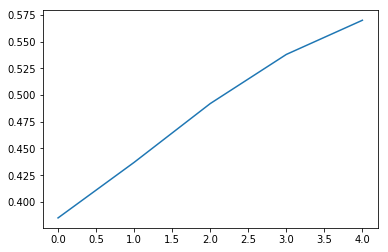

In [28]:
#we want to see visually from which latent variable the variance changes very slightly 
plt.plot(X_Variance.Latent_Factors,X_Variance.Cummulative_X_Variance)
plt.show()
#it is difficult to find the optimal number as it continious to increase with he same pace 
#even for 20 latent variables(not seen on the chart,but I tried)